### 意图识别（Intent Recognition）

意图识别（Intent Recognition）是指通过自然语言文本来**自动识别出用户的意图或目的**的一项技术任务。在人机交互、语音识别、自然语言处理等领域中，意图识别扮演着至关重要的角色。

意图识别有很多用途，例如在搜索引擎中分析用户的核心搜索需求，在对话系统中了解用户想要什么业务或者闲聊，在身份识别中判断用户的身份信息等等。意图识别可以提高用户体验和服务质量。

#### 任务1：数据读取与分析

#### 步骤1：
下载意图识别数据集，该数据集是一个多分类任务，目标是根据用户的输入文本判断用户的意图。意图识别数据集的下载地址和练习平台如下：https://competition.coggle.club/

#### 步骤2：
使用Pandas库读取数据集，Pandas是一个用于数据分析和处理的Python库，可以方便地读取、操作和保存各种格式的数据文件。使用Pandas的read_csv函数可以读取csv格式的数据文件，并返回一个DataFrame对象。



In [194]:
import pandas as pd

train_data = pd.read_csv("Coggle比赛数据/对话意图识别/train.csv", sep="\t", header=None, names=["text", "target"])
test_data = pd.read_csv("Coggle比赛数据/对话意图识别/test.csv", sep="\t", header=None, names=["text"])

In [ ]:
train_data.head()

In [ ]:
test_data.head()

#### 步骤3：
统计训练集和测试集的类别分布、文本长度等基本信息，以了解数据集的特征和难度。使用DataFrame对象的value_counts函数可以统计每个类别出现的次数和比例，使用apply函数和len函数可以统计每个文本的长度。

##### 类别分布

In [ ]:
train_data.describe()

In [ ]:
# 统计每个类别出现的次数
train_data["target"].value_counts(dropna=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 5))
train_data["target"].value_counts(dropna=False).plot(kind='barh')
plt.show()

In [ ]:
# 标准化normalize=True 查看占比
train_data["target"].value_counts(normalize=True)

从上述统计结果中可以看出：训练数据中除了类别“TVProgram-Play”、“Audio-Play”、“Other”占比较少外，其他类别占比较为均匀。

##### 文本长度

In [ ]:

train_data['text'].apply(len).median()

In [ ]:

test_data['text'].apply(len).median()

In [ ]:


plt.figure(figsize=(10, 5))

plt.subplot(121)
train_data['text'].apply(len).plot(kind='box')
plt.title('Train')

plt.subplot(122)
test_data['text'].apply(len).plot(kind='box')
plt.title('Test')
plt.show()



该次训练数据集文本长度中位数同测试集的一致，均为15，训练数据集文本长度离群点较多，测试集离群点较少，相对分布比较均匀。

In [ ]:
all_content = ''.join(train_data['text']) + ''.join(test_data['text'])

In [ ]:
print("数据集中总共包含了%d个字符" %(len(all_content)))

In [ ]:
# 使用jieba进行分词统计单词个数
import jieba
vocabulary = jieba.lcut(all_content)


In [ ]:
print("数据集中总共包含了%d个单词" %(len(vocabulary)))

按照意图类别绘制词云图

In [ ]:
all_target = train_data["target"].unique().tolist()

In [ ]:
all_target

In [ ]:
from wordcloud import wordcloud

In [ ]:
content = ''.join(train_data[train_data['target'].str.contains('Travel-Query')]['text'])
wc = wordcloud.WordCloud(background_color = 'white',width=600,height=600,font_path = 'msyh.ttc')
wc.generate(' '.join(jieba.lcut(content)))
plt.show(wc)


In [ ]:
for target in all_target:
    content = ''.join(train_data[train_data['target'].str.contains(target)]['text'])
    wc = wordcloud.WordCloud(background_color = 'white',width=800,height=600,max_words = 1000,font_path = 'msyh.ttc')
    wc.generate(' '.join(jieba.lcut(content)))
    wc.to_file('result/' + target + 'ciyun.jpg')

> 未去停用词的话存在大量的无用词，因此增加去停用词的处理。

In [ ]:
content = ''.join(train_data[train_data['target'].str.contains('Travel-Query')]['text'])
stop_words = [line.strip().lstrip() for line in open("stop_words.txt", 'r', encoding='utf-8').readlines()]
cut_words = [k for k in jieba.lcut(content, cut_all=False) if ((k not in stop_words)and(len(k)>1))]
wc = wordcloud.WordCloud(background_color = 'white',width=600,height=600,font_path = 'msyh.ttc')
wc.generate(' '.join(cut_words))
plt.show(wc)


In [ ]:
for target in all_target:
    content = ''.join(train_data[train_data['target'].str.contains(target)]['text'])
    stop_words = [line.strip().lstrip() for line in open("stop_words.txt", 'r', encoding='utf-8').readlines()]
    cut_words = [k for k in jieba.lcut(content, cut_all=False) if ((k not in stop_words)and(len(k)>1))]
    wc = wordcloud.WordCloud(background_color = 'white',width=800,height=600,max_words = 1000,font_path = 'msyh.ttc')
    wc.generate(' '.join(cut_words))
    wc.to_file('result/' + target + 'stopword_ciyun.jpg')

##### 步骤4：

通过上述步骤，请回答下面问题:

* 数据集的类别分布一致吗？根据统计结果，比较训练集和测试集中每个类别出现的次数和比例是否相近。
    * 训练集中除了三个类别“TVProgram-Play”、“Audio-Play”、“Other”占比较少外，其他类别分布均匀。
* 数据集中的文本是长文本还是短文本？根据统计结果，查看每个文本的长度分布情况，如文本长度的中位数。
    * 文本为短文本，训练集和测试集的中位数为15。
* 数据集中总共包含了多少个字符，多少个单词？将单词按照意图类别绘制云图。

--------------------

#### 任务2：TFIDF提取与分类

> TFIDF（词频-逆文档频率）是一种常见的文本表示方法，可以用于文本分类任务。TFIDF将文本表示为词项的权重向量，其中每个词项的权重由其在文本中出现的频率和在整个语料库中出现的频率共同决定。TFIDF可以反映出词项在文本中的重要程度，越是常见的词项权重越低，越是稀有的词项权重越高。

#### 步骤1：
使用sklearn中的TfidfVectorizer类提取训练集和测试集的特征




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba

In [ ]:
# 训练集和测试集使用结巴分词并存储结果
train_data['word'] = train_data['text'].apply(jieba.lcut)
test_data['word'] = test_data['text'].apply(jieba.lcut)

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
# 提取训练集和测试集的特征
all_data = pd.concat([train_data, test_data])
vector = TfidfVectorizer(max_features=2000).fit([' '.join(x) for x in all_data['word']])



In [ ]:
X_len = train_data.shape[0] * 0.3

In [ ]:
X_len

In [ ]:
# 划分训练集和验证集
import numpy as np
# 打乱数据
train_data = train_data.sample(frac=1.0)
X, X_valid = train_data.iloc[:-int(X_len)], train_data.iloc[-int(X_len):]

X_data = vector.transform([' '.join(x) for x in X['word']])
X_valid_data = vector.transform([' '.join(x) for x in X_valid['word']])


#### 步骤2：使用KNN/LR/SVM等分类器对训练集进行训练，并对验证集和测试集进行预测，评估模型的性能。

##### 1、使用LR分类器进行训练：

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
# 使用LogisticRegression分类器
model = LogisticRegression().fit(X_data, X['target'])

# TFIDF + LR准确率
print("验证集准确率为：%f"%(model.score(X_valid_data, X_valid['target'])))



In [ ]:
test_data.head()

In [ ]:
test_tfidf_data = vector.transform([' '.join(x) for x in test_data['word']])

In [ ]:
test_tfidf_data.shape

In [ ]:
model.predict(test_tfidf_data[1]).tolist()[0]

In [ ]:
result_predict = []
for dd in test_tfidf_data:
    result_predict.append(model.predict(dd).tolist()[0])

In [ ]:
pd.DataFrame(result_predict,columns=["Target"]).reset_index().rename(columns={'index':'ID'}).to_csv("tfidf_LR_predict.csv", index=False)

将对测试集预测的结果提交到练习平台上进行评分结果如下：

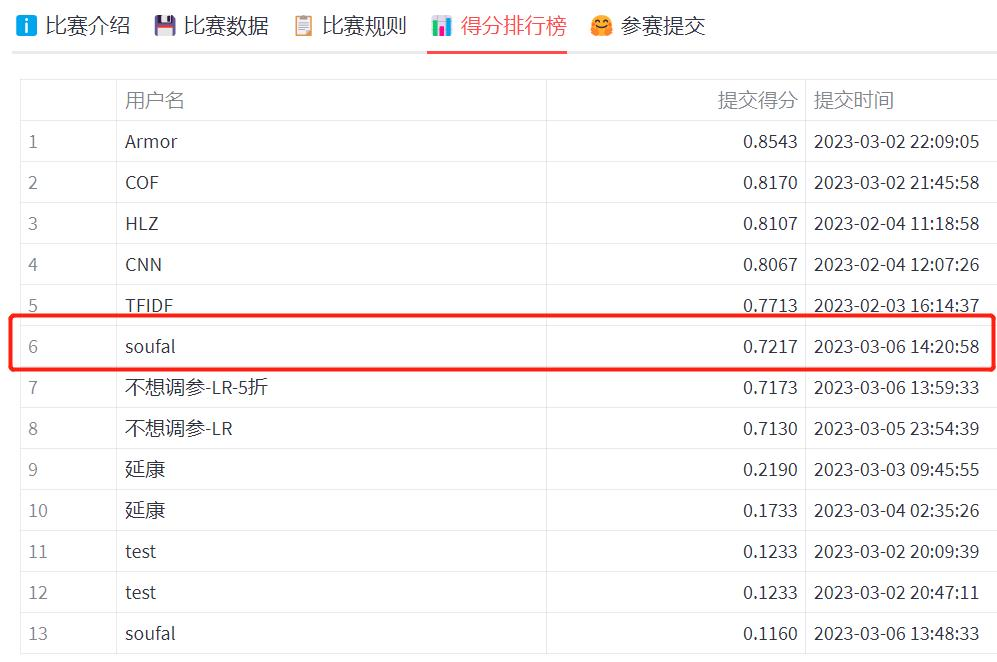

##### 2、使用KNN分类器进行训练：

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_data, X['target'])

# TFIDF + KNN准确率
print("验证集准确率为：")
clf.score(X_valid_data, X_valid['target'])

In [ ]:
# 设置多个k近邻进行比较
n_neighbors = [1, 3, 5, 8, 10, 40]

for i, k in enumerate(n_neighbors):
    # 欧氏距离p=2
    clf = KNeighborsClassifier(n_neighbors=k, weights="distance")
    # 训练
    clf.fit(X_data, X['target'])
    print("k为%d时，验证集准确率为%f：" %(k,clf.score(X_valid_data, X_valid['target'])))
    


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=1, weights="distance")
KNN_model.fit(X_data,X["target"])
print("验证集准确率为：%f" %(KNN_model.score(X_valid_data, X_valid['target'])))


In [ ]:
KNN_predict = []
for dd in test_tfidf_data:
    KNN_predict.append(KNN_model.predict(dd).tolist()[0])

In [ ]:
pd.DataFrame(KNN_predict,columns=["Target"]).reset_index().rename(columns={'index':'ID'}).to_csv("tfidf_KNN_predict.csv", index=False)

将对测试集预测的结果提交到练习平台上进行评分结果如下：

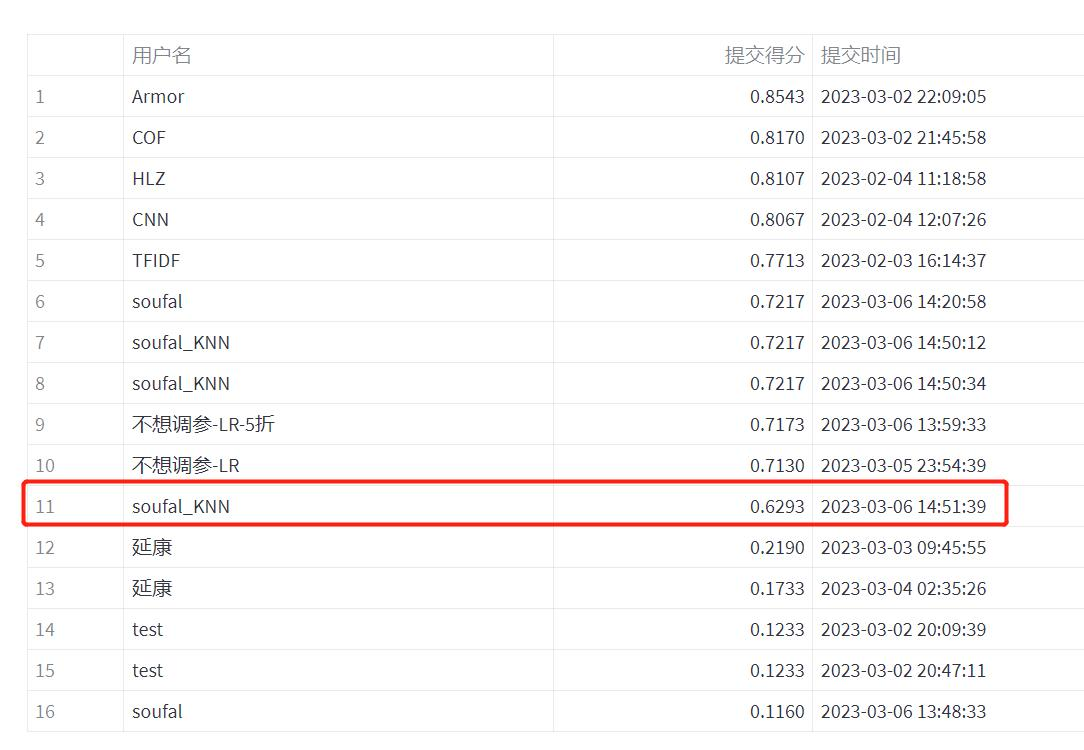

会发现分类结果不如LR

##### 3、使用SVM分类器进行训练：

In [ ]:
from sklearn.svm import LinearSVC,SVC

In [ ]:
LinearSVC_model = LinearSVC()
LinearSVC_model.fit(X_data, X["target"])
print("验证集准确率为：%f" %(LinearSVC_model.score(X_valid_data, X_valid['target'])))

In [ ]:
LinearSVC_predict = []
for dd in test_tfidf_data:
    LinearSVC_predict.append(LinearSVC_model.predict(dd).tolist()[0])

In [ ]:
pd.DataFrame(LinearSVC_predict,columns=["Target"]).reset_index().rename(columns={'index':'ID'}).to_csv("tfidf_LinearSVC_predict.csv", index=False)

将对测试集预测的结果提交到练习平台上进行评分结果如下：

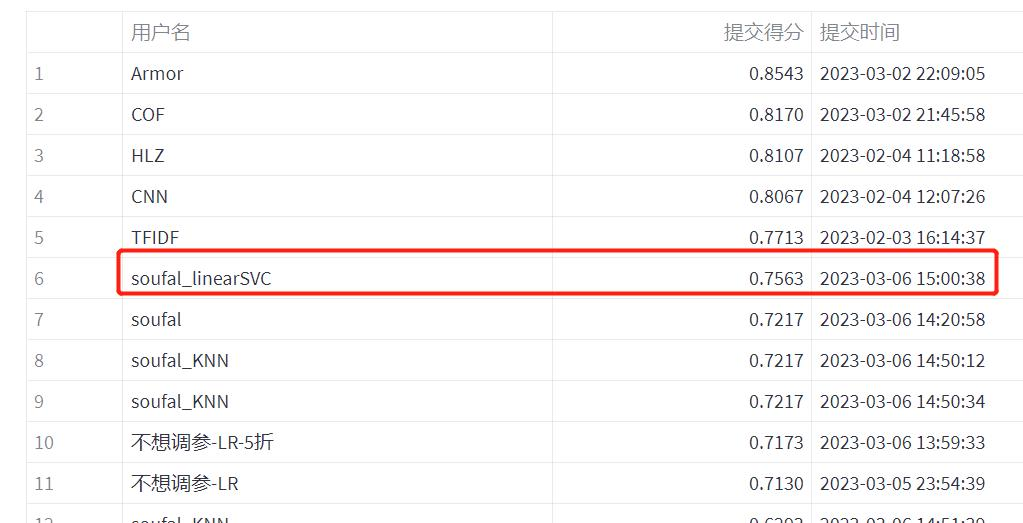

所得结果目前最好，但是依旧未达到80%的准确率。

In [ ]:
SVC_model=SVC(kernel='linear', C=1)
SVC_model.fit(X_data, X["target"])
print("验证集准确率为：%f" %(SVC_model.score(X_valid_data, X_valid['target'])))

---------------------------------

#### 任务3：词向量训练与使用

#### 步骤1：
使用结巴对文本进行分词，结巴是一个基于Python的中文分词工具，并支持自定义字典和停用词。



In [195]:
import jieba

# 定义停用词
stop_words = [line.strip().lstrip() for line in open("stop_words.txt", 'r', encoding='utf-8').readlines()]



In [196]:
# 使用jieba分词并去掉停用词
def cut_wordsss(df):
    jieba.suggest_freq('墓王之王', True)
    cut_word = jieba.lcut(df['text'],HMM=True)
    result = [k for k in cut_word if ((k not in stop_words))]
    return result

In [197]:
train_data['word'] = train_data.apply(cut_wordsss, axis = 1)

In [198]:
train_data.head(10)

,text,target,word
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query,"[双鸭山, 淮阴, 汽车票, 13, 号]"
1,从这里怎么回家,Travel-Query,[回家]
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play,"[随便, 播放, 一首, 专辑, 阁楼, 里, 佛里, 歌]"
3,给看一下墓王之王嘛,FilmTele-Play,[墓王之王]
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play,"[想, 挑战, 两把, s686, 突变, 团, 竞, 游戏, 视频]"
5,我想看和平精英上战神必备技巧的游戏视频,Video-Play,"[想, 和平, 精英, 战神, 必备, 技巧, 游戏, 视频]"
6,2019年古装爱情电视剧小女花不弃的花絮播放一下,Video-Play,"[2019, 年, 古装, 爱情, 电视剧, 小女, 花, 不弃, 花絮, 播放]"
7,找一个2004年的推理剧给我看一会呢,FilmTele-Play,"[2004, 年, 推理, 剧给, 一会]"
8,自驾游去深圳都经过那些地方啊,Travel-Query,"[自驾游, 深圳, 地方]"
9,给我转播今天的女子双打乒乓球比赛现场,Video-Play,"[转播, 女子双打, 乒乓球, 比赛, 现场]"


In [199]:
test_data['word'] = test_data.apply(cut_wordsss, axis = 1)

In [200]:
test_data.head()

,text,word
0,回放CCTV2的消费主张,"[回放, CCTV2, 消费]"
1,给我打开玩具房的灯,"[打开, 玩具, 房, 灯]"
2,循环播放赵本山的小品相亲来听,"[循环, 播放, 赵本山, 小品, 相亲, 听]"
3,15号上午10点带孩子去海洋馆的行程帮我制定下。,"[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 帮, 制定, 下]"
4,把智能扫地机器人关掉,"[智能, 扫地, 机器人, 关掉]"


##### 步骤2：
使用gensim训练词向量，也可以考虑加载已有的预训练词向量。gensim是一个基于Python的自然语言处理库，可以方便地训练或加载词向量，并进行相似度计算、最近邻查询等操作。

In [201]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [202]:
all_sentences = train_data['word'].to_list()

##### 低频次处理，统计所有词的词频，若词频小于5则赋值为`<unk>`

In [203]:
all_vocabular = {}
for ss in all_sentences:
    for ww in ss:
        if ww not in all_vocabular:
            all_vocabular[ww] = 1
        else:
            all_vocabular[ww] += 1

In [204]:
# 过滤出词频小于5的词
low_words = dict((key,value) for key, value in all_vocabular.items() if value < 5)

In [205]:
len(low_words)

8957

In [207]:
# 基于词频替换词用于词向量训练
final_sentences = []
for ss in all_sentences:
    single = []
    for ww in ss:
        if ww in low_words:
            single.append('<unk>')
        else:
            single.append(ww)
    final_sentences.append(single)

In [208]:
# 训练词向量并存储
model = Word2Vec(final_sentences, window=5, sg=1, epochs=50, min_count=5)
model.save("train_vec_with_unk.model")
model.wv.save_word2vec_format('train_vec_with_unk.vector', binary=False)

##### 最近邻查询


In [209]:
tq = model.wv.most_similar('飞机', topn=10)
print(tq)

[('起飞', 0.7576045393943787), ('首尔', 0.7125601172447205), ('莫斯科', 0.7091957926750183), ('航班', 0.7070403099060059), ('客机', 0.7015898823738098), ('飞', 0.6813156008720398), ('经停', 0.6739810109138489), ('九江', 0.6574002504348755), ('巴黎', 0.6445832848548889), ('飞往', 0.6398859024047852)]


In [210]:
mp = model.wv.most_similar('歌曲', topn=10)
print(mp)

[('歌', 0.6882795691490173), ('歌来', 0.6751900911331177), ('神曲', 0.6714072823524475), ('爵士乐', 0.670644223690033), ('曲子', 0.6647385358810425), ('英语歌', 0.6635110378265381), ('古典音乐', 0.6576535105705261), ('情歌', 0.6522089242935181), ('粤语', 0.6495440006256104), ('张学友', 0.6435813903808594)]


In [211]:
mp = model.wv.most_similar('播放', topn=10)
print(mp)

[('观看', 0.4924105703830719), ('刘亦菲', 0.4752129316329956), ('儿子', 0.47335490584373474), ('我播', 0.4726516604423523), ('点播', 0.4678885340690613), ('周润发', 0.4654140770435333), ('列表', 0.4644535481929779), ('赵丽颖', 0.4628901481628418), ('一曲', 0.4623012840747833), ('第二集', 0.4568789303302765)]


##### 相似度计算

In [212]:
# 计算两个词的相似度
model.wv.similarity('飞机', '高铁')

0.5969239

##### 步骤3：
使用词向量对单词进行编码，然后计算句子向量（可以直接求词向量均值）。将每个单词替换为其对应的词向量后，得到一个由多个向量组成的矩阵。为了简化计算和降低维度，可以对矩阵按行求均值，得到一个代表句子含义的句子向量。

In [213]:
# 加载模型
my_model = Word2Vec.load('train_vec_with_unk.model')

In [214]:
def averageVector(many_vectors, column_num):
    """
    求多个向量的权值向量
    :param many_vector:
    :column_num:向量列数
    """
    average_vector = []
    for i in range(0, column_num, 1):
        average_vector.append(0)
    row_num = len(many_vectors)
    # 先求出各个列权重之和  后面再求平均值
    row_index = 0
    for weight_index, vector in enumerate(many_vectors):
        for i in range(0, column_num, 1):
            average_vector[i] += float(vector[i]) 
        row_index += 1
    for i in range(0, column_num, 1):
        average_vector[i] = average_vector[i] / row_num
    return average_vector

In [246]:
def get_sentence_matrx(df):
    # 获取句子的向量矩阵
    single_sentence_vec = []
    for word in df['word_with_unk']:
        try:
            word_vec = my_model.wv[word]
            single_sentence_vec.append(word_vec.tolist())
        except KeyError:
            word_vec = my_model.wv['<unk>']
    # 计算句子向量
    if len(single_sentence_vec) != 0:
        feature = averageVector(many_vectors=single_sentence_vec, column_num=100)
    else:
        feature = my_model.wv['<unk>']
    return feature
    

In [220]:
# 将训练集和测试集中的低频词进行替换
def replace_word(df):
    single = []
    for ww in df['word']:
        if ww in low_words:
            single.append('<unk>')
        else:
            single.append(ww)
    return single
    

In [247]:
train_data['word_with_unk'] = train_data.apply(replace_word, axis = 1)
test_data['word_with_unk'] = test_data.apply(replace_word, axis = 1)

In [248]:
train_data['sentence_vec'] = train_data.apply(get_sentence_matrx, axis = 1)
test_data['sentence_vec'] = test_data.apply(get_sentence_matrx, axis = 1)

In [223]:
train_data.head()

,text,target,word,word_with_unk,sentence_vec
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query,"[双鸭山, 淮阴, 汽车票, 13, 号]","[<unk>, <unk>, 汽车票, 13, 号]","[-0.01010482907295227, 0.16529124826192856, -0..."
1,从这里怎么回家,Travel-Query,[回家],[回家],"[-0.3998226523399353, 0.24477429687976837, -0...."
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play,"[随便, 播放, 一首, 专辑, 阁楼, 里, 佛里, 歌]","[随便, 播放, 一首, 专辑, <unk>, 里, <unk>, 歌]","[-0.41635605320334435, 0.11039961455389857, 0...."
3,给看一下墓王之王嘛,FilmTele-Play,[墓王之王],[<unk>],"[-0.1382521092891693, 0.3116063177585602, -0.2..."
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play,"[想, 挑战, 两把, s686, 突变, 团, 竞, 游戏, 视频]","[想, 挑战, <unk>, <unk>, <unk>, <unk>, <unk>, 游戏,...","[-0.201049933830897, 0.3243485689163208, -0.15..."


In [224]:
test_data.head()

,text,word,word_with_unk,sentence_vec
0,回放CCTV2的消费主张,"[回放, CCTV2, 消费]","[回放, <unk>, <unk>]","[-0.265785813331604, 0.3029854893684387, -0.05..."
1,给我打开玩具房的灯,"[打开, 玩具, 房, 灯]","[打开, <unk>, <unk>, 灯]","[-0.10163815319538116, 0.35959359258413315, -0..."
2,循环播放赵本山的小品相亲来听,"[循环, 播放, 赵本山, 小品, 相亲, 听]","[循环, 播放, <unk>, 小品, <unk>, 听]","[-0.17230188846588135, 0.129993903140227, 0.05..."
3,15号上午10点带孩子去海洋馆的行程帮我制定下。,"[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 帮, 制定, 下]","[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 帮, 制定, 下]","[-0.06394505314528942, 0.36840555295348165, -0..."
4,把智能扫地机器人关掉,"[智能, 扫地, 机器人, 关掉]","[智能, 扫地, 机器人, 关掉]","[-0.4661285192705691, 0.7595191523432732, -0.1..."


##### 步骤4：
使用LR、SVM和决策树对句子向量进行训练，验证和预测。LR（逻辑回归）、SVM（支持向量机）和决策树都是常用的机器学习分类算法，可以使用sklearn库中提供的相关函数来实现。

In [251]:
# 划分训练集和验证集
import numpy as np

X_len = train_data.shape[0] * 0.3
# 打乱数据
train_data = train_data.sample(frac=1.0)
X, X_valid = train_data.iloc[:-int(X_len)], train_data.iloc[-int(X_len):]



In [252]:
X.shape

(8470, 5)

In [253]:
X_valid.shape

(3630, 5)

##### 使用LR进行训练

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
# 使用LogisticRegression分类器
LR_model = LogisticRegression().fit(X['sentence_vec'].to_list(), X['target'])

# TFIDF + LR准确率
print("验证集准确率为：%f"%(LR_model.score(X_valid['sentence_vec'].to_list(), X_valid['target'])))



验证集准确率为：0.880165


d:\python_virenv\envs\AI\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [266]:
test_data.head()

,text,word,word_with_unk,sentence_vec
0,回放CCTV2的消费主张,"[回放, CCTV2, 消费]","[回放, <unk>, <unk>]","[-0.265785813331604, 0.3029854893684387, -0.05..."
1,给我打开玩具房的灯,"[打开, 玩具, 房, 灯]","[打开, <unk>, <unk>, 灯]","[-0.10163815319538116, 0.35959359258413315, -0..."
2,循环播放赵本山的小品相亲来听,"[循环, 播放, 赵本山, 小品, 相亲, 听]","[循环, 播放, <unk>, 小品, <unk>, 听]","[-0.17230188846588135, 0.129993903140227, 0.05..."
3,15号上午10点带孩子去海洋馆的行程帮我制定下。,"[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 帮, 制定, 下]","[15, 号, 上午, 10, 点带, 孩子, 海洋馆, 行程, 帮, 制定, 下]","[-0.06394505314528942, 0.36840555295348165, -0..."
4,把智能扫地机器人关掉,"[智能, 扫地, 机器人, 关掉]","[智能, 扫地, 机器人, 关掉]","[-0.4661285192705691, 0.7595191523432732, -0.1..."


In [267]:
LR_model.predict(test_data['sentence_vec'].to_list()[0]).tolist()[0]

ValueError: Expected 2D array, got 1D array instead:
array=[-0.26578581  0.30298549 -0.05656361  0.5516543  -0.13866778 -0.27886265
  0.02833389  0.41585875 -0.24660623 -0.02494459  0.28072516 -0.21948105
 -0.20759507  0.2817693   0.10073655  0.10315186 -0.22265957 -0.41495772
 -0.18943521 -0.50981605  0.1180791  -0.0630109   0.57921294  0.0463466
  0.01654702  0.03366625 -0.12635691  0.2641212  -0.29291433 -0.1433144
 -0.12575934  0.20484264  0.07129822 -0.29745106  0.12086511  0.61208391
  0.20587578 -0.13792398  0.11493206  0.14386255 -0.53717409 -0.22248
 -0.14659276  0.24869067  0.11629929 -0.00921361  0.26409343  0.08160047
  0.28921156  0.10296975 -0.08509432 -0.01163743 -0.07379363  0.02836779
  0.06124824  0.1017864   0.08776012  0.03234054  0.2015531   0.11597718
  0.06920019 -0.04896918 -0.12322329 -0.10845342  0.00708713  0.04571835
 -0.13522039  0.01319228 -0.23870169  0.12000078 -0.0263952   0.00417339
  0.2589346  -0.31532748  0.26961536  0.26700413 -0.17608482  0.18115947
 -0.00992408 -0.10069982  0.15859011  0.13316388  0.44749134  0.03970134
 -0.42028984 -0.3298855   0.08090628  0.26612969  0.14827933 -0.17077198
  0.20720869  0.21762238 -0.17889727  0.12830803  0.37984113  0.2770976
 -0.0011991  -0.12651572  0.04346679  0.39275006].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [260]:
result_predict = []
for dd in test_data['sentence_vec'].tolist():
    result_predict.append(LR_model.predict(dd)[0])

ValueError: Expected 2D array, got 1D array instead:
array=[-0.26578581  0.30298549 -0.05656361  0.5516543  -0.13866778 -0.27886265
  0.02833389  0.41585875 -0.24660623 -0.02494459  0.28072516 -0.21948105
 -0.20759507  0.2817693   0.10073655  0.10315186 -0.22265957 -0.41495772
 -0.18943521 -0.50981605  0.1180791  -0.0630109   0.57921294  0.0463466
  0.01654702  0.03366625 -0.12635691  0.2641212  -0.29291433 -0.1433144
 -0.12575934  0.20484264  0.07129822 -0.29745106  0.12086511  0.61208391
  0.20587578 -0.13792398  0.11493206  0.14386255 -0.53717409 -0.22248
 -0.14659276  0.24869067  0.11629929 -0.00921361  0.26409343  0.08160047
  0.28921156  0.10296975 -0.08509432 -0.01163743 -0.07379363  0.02836779
  0.06124824  0.1017864   0.08776012  0.03234054  0.2015531   0.11597718
  0.06920019 -0.04896918 -0.12322329 -0.10845342  0.00708713  0.04571835
 -0.13522039  0.01319228 -0.23870169  0.12000078 -0.0263952   0.00417339
  0.2589346  -0.31532748  0.26961536  0.26700413 -0.17608482  0.18115947
 -0.00992408 -0.10069982  0.15859011  0.13316388  0.44749134  0.03970134
 -0.42028984 -0.3298855   0.08090628  0.26612969  0.14827933 -0.17077198
  0.20720869  0.21762238 -0.17889727  0.12830803  0.37984113  0.2770976
 -0.0011991  -0.12651572  0.04346679  0.39275006].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
pd.DataFrame(result_predict,columns=["Target"]).reset_index().rename(columns={'index':'ID'}).to_csv("tfidf_LR_predict.csv", index=False)